In [53]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
    'Malic acid', 'Ash',
    'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines',
    'Proline']


In [54]:
import numpy as np
print('class labels',np.unique(df_wine['Class label']))

class labels [1 2 3]


In [55]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [56]:
from sklearn.cross_validation import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1',C=0.1)
lr.fit(X_train_std,y_train)
print('training_accuracy',lr.score(X_train_std,y_train)*100)
print('testing_accuracy',lr.score(X_test_std,y_test)*100)

training_accuracy 98.38709677419355
testing_accuracy 98.14814814814815


In [58]:
lr.intercept_

array([-0.38380452, -0.15813357, -0.70046311])

In [59]:
lr.coef_

array([[ 0.27983661,  0.        ,  0.        , -0.02798964,  0.        ,
         0.        ,  0.70978294,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23669785],
       [-0.64379721, -0.06894626, -0.05716605,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.9271586 ,
         0.05978451,  0.        , -0.37099328],
       [ 0.        ,  0.0614586 ,  0.        ,  0.        ,  0.        ,
         0.        , -0.63564506,  0.        ,  0.        ,  0.49785585,
        -0.35843094, -0.57172718,  0.        ]])

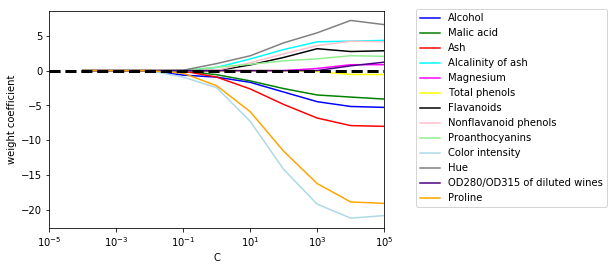

In [66]:
#plot regularization_paths

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
        'magenta', 'yellow', 'black',
        'pink', 'lightgreen', 'lightblue',
        'gray', 'indigo', 'orange']
weights, params = [], []

for c in range(-4,6):
    lr = LogisticRegression(penalty='l1',C=10**c,random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],label=df_wine.columns[column+1],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38, 1.03),ncol=1, fancybox=True)
plt.show()

In [95]:
x = tuple(range(5))

In [96]:
x

(0, 1, 2, 3, 4)

In [98]:
from itertools import combinations

In [102]:
list(combinations(x,r=4))

[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4)]